# Zomato : Exploratory Data Analysis 

# Importing Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset

In [87]:
pd.pandas.set_option("display.max_columns",None)

In [88]:
df=pd.read_csv('zomato.csv',encoding='latin-1')

# Exploratory Data Analysis

In [89]:
df[:3]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [8]:
# shape of the dataframe
df.shape

(9551, 21)

In [9]:
# columns of dataframe
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [90]:
# reading another dataset
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [91]:
# merging the two datasets
df=pd.merge(df,df_country,on='Country Code', how='left')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [92]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [27]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [28]:
# checking null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [29]:
feature_with_nan=[features for features in df.columns if df[features].isnull().sum()>0]
feature_with_nan

['Cuisines']

## Data Visualization

In [30]:
country_names=df.Country.value_counts().index
country_val=df.Country.value_counts().values

### Top 3 Countries that uses Zomato

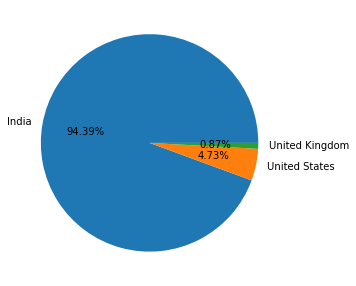

In [32]:
# Pie Chart
plt.figure(figsize=(12,5))
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')
plt.show()

**Observation**:

Zomato's maximum records or transaction are from `India`, after that `USA` and then `United Kingdoms`.

In [93]:
ratings=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


#### Observation
1. When Rating is between 4.5 to 4.9---> Excellent
2. When Rating is between 4.0 to 4.4---> Very Good
3. when Rating is between 3.5 to 3.9----> Good
4. when Rating is between 2.5 to 3.4----> Average
5. when Rating is between 0 ----> Not Rated

In [34]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


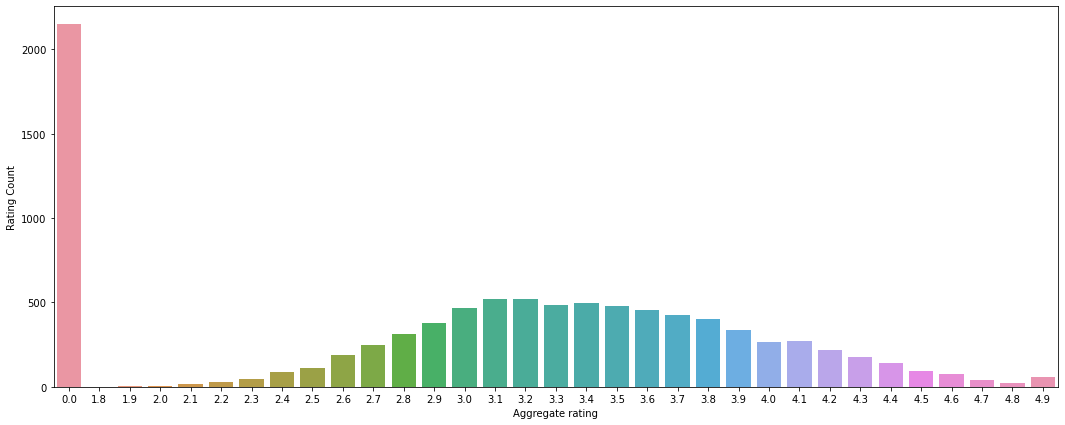

In [94]:
plt.figure(figsize=(18,7))
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)
plt.show()

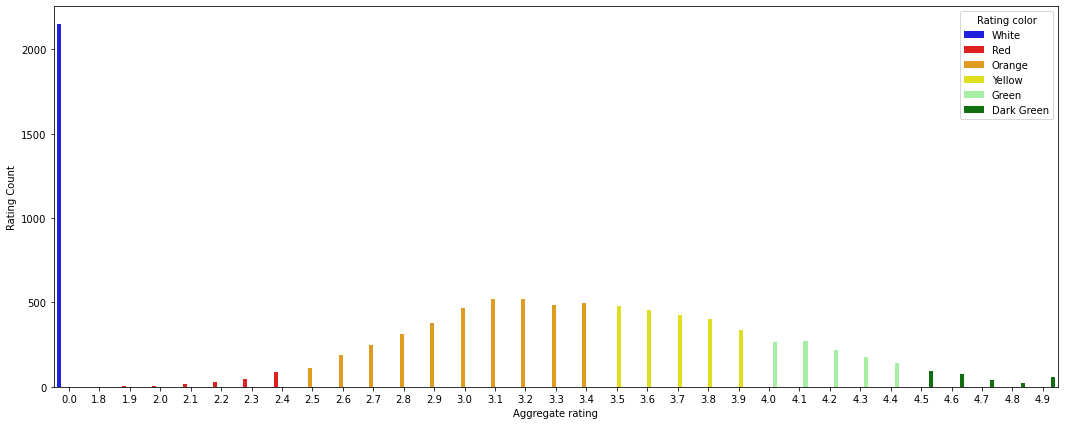

In [44]:
plt.figure(figsize=(18,7))
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',
            data=ratings,palette=['blue','red','orange','yellow','palegreen','green'])
plt.show()

#### Observation:

1. Not Rated count is very high.
2. Maximum number of rating are between 2.5 to 3.4

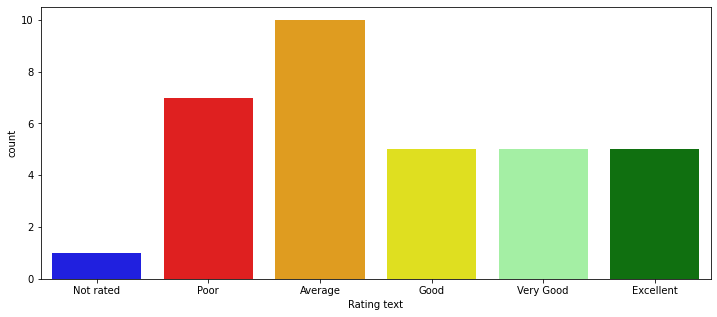

In [53]:
# Count plot
plt.figure(figsize=(12,5))
sns.countplot(x="Rating text",data=ratings,
              palette=['blue','red','orange','yellow','palegreen','green'])
plt.show()

#### Observation:

Most people choose to give `Average` rating.

### Countries that have given '0' Rating 

In [71]:
zero_rating=df[df['Aggregate rating']==0].groupby("Country").size().reset_index().rename(columns={0:"Count"})
zero_rating

,Country,Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


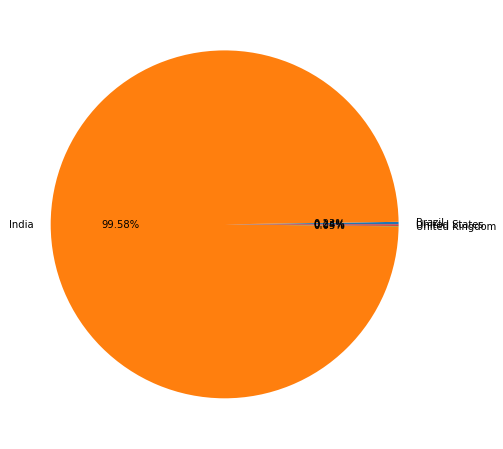

In [72]:
plt.pie(x=zero_rating["Count"],labels=zero_rating["Country"],autopct="%1.2f%%")
plt.show()

**Observations :** 

Maximum number of 0 ratings are from Indian customers

### Finding out which currency is used by which country

In [74]:
df.groupby(['Country','Currency']).size().reset_index()[["Country","Currency"]]

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


### Finding which Countries do have online deliveries option

In [77]:
print(df[df['Has Online delivery'] =="Yes"].Country.unique())

['UAE' 'India']


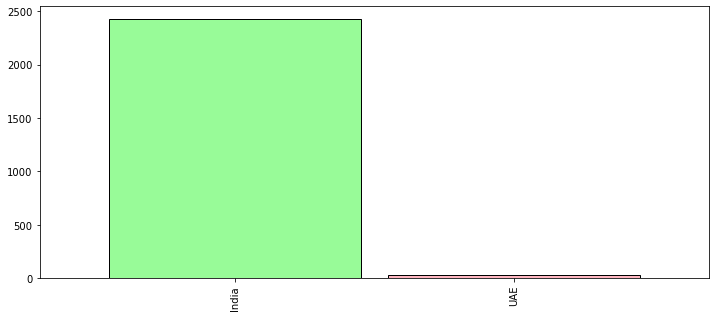

In [82]:
plt.figure(figsize=(12,5))
df[df['Has Online delivery'] =="Yes"].Country.value_counts().plot.bar(color=["palegreen","lightpink"],ec="k",width=0.9)
plt.show()

**Observations:**

Online Deliveries are available in `India` and `UAE` only, out of which Indian restaurants prefer to provide more online delivery options as compared to USA.

### Top 5 Cities' Restaurant Distribution

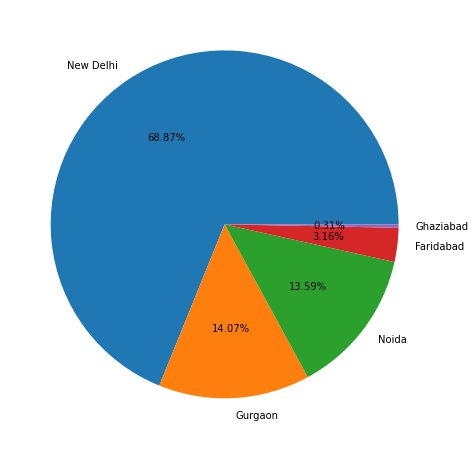

In [83]:
city_values=df.City.value_counts().values
city_labels=df.City.value_counts().index
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()

**Observations :**
    
* Maximum number of restaurants belong to India.
* `New Delhi` have maximum number of restaurants followed by `Gurgaon` and `Noida`.

### Top 10 Cuisines

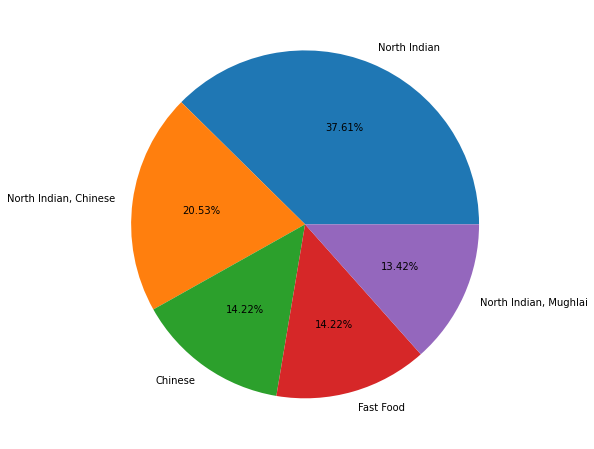

In [86]:
cuisines_values=df.Cuisines.value_counts().values
cuisines_labels=df.Cuisines.value_counts().index
plt.pie(cuisines_values[:5],labels=cuisines_labels[:5],autopct='%1.2f%%')
plt.show()

**Observations :**
    
* People prefer to eat `North Indian` food most followed by Chinese and Fast Food.